In [99]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime 
import time 


In [100]:
titleList = []
priceList = []
areaList = []
typesList = []
sizeList = []
bedroomList = []
datesList =[]
timesStampList = []

In [101]:
i = 1

url = "https://www.mudah.my/Selangor/Apartments-for-sale-2020?lst=" +str(i)+ "&fs=1&w=108&cg=2020&so=1&st=s"

In [96]:
while i<=15:
    
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'lxml')
    
    title = soup.find_all('h2', {'class':'list_title'})
    price = soup.find_all('div', {'class':'ads_price'})
    area = soup.find_all('div', {'class':'area'})
    types = soup.find_all('div', {'class':'apartments'})
    size = soup.find_all('div', {'class':'apartmentAndLandAndRoomsAndNew-Properties-size'})
    bedroom = soup.find_all('div', {'class':'bedroom'})
    dates = soup.find_all('div', {'class':'bottom_info div:nth-child(1)'})
    timesstamp = soup.findAll('div', {'class':'_timestamp'})

    timesstamp = [k.text for k in timesstamp]
    timesstamp = timesstamp[:-1]
    
    title = [k.text for k in title]
    title = title[:-1]
    
    price = [k.text for k in price]
    price = price[:-1]
    
    area = [k.text for k in area]
    area = area[:-1]
    
    types = [k.text for k in types]
    types = types[:-1]
    
    size = [k.text for k in size]
    size = size[:-1]
    
    bedroom = [k.text for k in bedroom]
    bedroom = bedroom[:-1]
    
    dates = [k.text for k in dates]
    dates = dates[:-1]
    
    titleList += title
    priceList += price
    areaList += area
    typesList += types
    sizeList += size
    bedroomList += bedroom
    datesList += dates
    
    print("number of pages that been scraped : ", i)
    i = i+1


number of pages that been scraped :  1
number of pages that been scraped :  2
number of pages that been scraped :  3
number of pages that been scraped :  4
number of pages that been scraped :  5
number of pages that been scraped :  6
number of pages that been scraped :  7
number of pages that been scraped :  8
number of pages that been scraped :  9
number of pages that been scraped :  10
number of pages that been scraped :  11
number of pages that been scraped :  12
number of pages that been scraped :  13
number of pages that been scraped :  14
number of pages that been scraped :  15


In [78]:
df_title = pd.DataFrame()
df_price = pd.DataFrame()
df_area = pd.DataFrame()
df_types = pd.DataFrame()
df_size = pd.DataFrame()
df_bedroom = pd.DataFrame()
df_dates = pd.DataFrame()

print(len(titleList))
print(len(priceList))
print(len(areaList))
print(len(typesList))
print(len(sizeList))
print(len(bedroom))
print(len(datesList))


df_dates['Date'] = datesList
df_area['Area'] = areaList
df_title['Title'] = titleList
df_types['Type'] = typesList
df_bedroom['Bedroom'] = bedroomList
df_size['Size'] = sizeList
df_price['Price'] = priceList








1200
1200
1170
1260
1260
42
3030


In [79]:
#<div> Today,&nbsp;04:13 </div>

In [80]:
df_apartements = pd.concat([df_dates, df_area, df_title,df_types, df_bedroom, df_size, df_price ], axis=1)
df_apartements.head(10)

,Date,Area,Title,Type,Bedroom,Size,Price
0,"Today, 04:13 Damansara Damai",Damansara Damai,Apartment termurah cheras,Apartments,2 Bedrooms,516 sq.ft,RM 155 000
1,Apartments,Damansara Damai,Saujana apartment damansara damai,Apartments,3 Bedrooms,700 sq.ft,RM 250 000
2,516 sq.ft,Balakong,[Ready Tenant Rent RM1300 Sublet] Seri Jasa ...,Apartments,3 Bedrooms,850 sq.ft,RM 170 000
3,2 Bedrooms,Ulu Klang,Residensi Permata Melawati,Apartments,3 Bedrooms,1000 sq.ft,RM 463 950
4,1 Bathroom,Ampang,"For sale (1st floor) SRI WIRA APARTMENT ,UKA...",Apartments,3 Bedrooms,850 sq.ft,RM 265 000
5,"Today, 03:08 Damansara Damai",Gombak,PANORAMA SENTUL RESIDEN. Tmn Bullion Batu Ca...,Apartments,3 Bedrooms,1130 sq.ft,RM 490 000
6,Apartments,Puchong,[FREEHOLD LEVEL 1] ORCHID APARTMENT PUCHONG ...,Apartments,3 Bedrooms,750 sq.ft,RM 245 000
7,700 sq.ft,Damansara Perdana,"Metropolitan square condo damansara perdana,",Apartments,4 Bedrooms,2005 sq.ft,RM 900 000
8,3 Bedrooms,Puchong,[NON BUMI TENANTED] Apartment Penaga Mas Puc...,Apartments,3 Bedrooms,780 sq.ft,RM 180 000
9,2 Bathrooms,Kota Kemuning,[FREEHOLD GROUND FLOOR] Pangsapuri Sri Kemun...,Apartments,3 Bedrooms,753 sq.ft,RM 285 000


In [81]:
df_apartements.isnull().sum()


Date          0
Area       1860
Title      1830
Type       1770
Bedroom    1770
Size       1770
Price      1830
dtype: int64

In [82]:
df_apartements.dropna(inplace= True)
df_apartements.shape

(1170, 7)

In [83]:
df_apartements

,Date,Area,Title,Type,Bedroom,Size,Price
0,"Today, 04:13 Damansara Damai",Damansara Damai,Apartment termurah cheras,Apartments,2 Bedrooms,516 sq.ft,RM 155 000
1,Apartments,Damansara Damai,Saujana apartment damansara damai,Apartments,3 Bedrooms,700 sq.ft,RM 250 000
2,516 sq.ft,Balakong,[Ready Tenant Rent RM1300 Sublet] Seri Jasa ...,Apartments,3 Bedrooms,850 sq.ft,RM 170 000
3,2 Bedrooms,Ulu Klang,Residensi Permata Melawati,Apartments,3 Bedrooms,1000 sq.ft,RM 463 950
4,1 Bathroom,Ampang,"For sale (1st floor) SRI WIRA APARTMENT ,UKA...",Apartments,3 Bedrooms,850 sq.ft,RM 265 000
...,...,...,...,...,...,...,...
1165,"Yesterday, 21:25 Bangi",Seri Kembangan,PANORAMA SENTUL RESIDEN. Tmn Bullion Batu Ca...,Apartments,4 Bedrooms,800 sq.ft,RM 490 000
1166,Apartments,Seri Kembangan,[FREEHOLD LEVEL 1] ORCHID APARTMENT PUCHONG ...,Apartments,3 Bedrooms,864 sq.ft,RM 245 000
1167,800 sq.ft,Bandar Utama,"Metropolitan square condo damansara perdana,",Apartments,3 Bedrooms,857 sq.ft,RM 900 000
1168,4 Bedrooms,Selayang,[NON BUMI TENANTED] Apartment Penaga Mas Puc...,Apartments,3 Bedrooms,720 sq.ft,RM 180 000


In [90]:
# cleaned_df = df_apartements[~df_apartements['title'].str.contains(' naza ', case=False)]
# cleaned_df.shape

In [91]:
cleaned_df['price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
cleaned_df['price'] = pd.to_numeric(cleaned_df['price'])

cleaned_df

,title,price,area,types,size,bedroom
0,Saujana apartment damansara damai,250000,Damansara Damai,Apartments,700 sq.ft,3 Bedrooms
1,[Ready Tenant Rent RM1300 Sublet] Seri Jasa ...,170000,Balakong,Apartments,850 sq.ft,3 Bedrooms
2,Residensi Permata Melawati,463950,Ulu Klang,Apartments,1000 sq.ft,3 Bedrooms
3,"For sale (1st floor) SRI WIRA APARTMENT ,UKA...",265000,Ampang,Apartments,850 sq.ft,3 Bedrooms
4,PANORAMA SENTUL RESIDEN. Tmn Bullion Batu Ca...,490000,Gombak,Apartments,1130 sq.ft,3 Bedrooms
...,...,...,...,...,...,...
580,BELOW MARKET VALUE APPARTMENT menara u2 sebe...,300000,Seri Kembangan,Apartments,864 sq.ft,4 Bedrooms
581,FREEHOLD Kondominium Pelangi Sg Merab Bangi,310000,Bandar Utama,Apartments,1423 sq.ft,4 Bedrooms
582,STRATA O DEPO Bayu Saujana Indah Condo | PRI...,195000,Selayang,Apartments,487 sq.ft,2 Bedrooms
583,"For Sale= Main Place Residence USJ, Beside L...",35500,Serdang,Apartments,720 sq.ft,3 Bedrooms


In [92]:
df_apartements.to_csv('datasets/exportDataFrames.csv', index=False, header=True)

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline



In [35]:
location_group = cleaned_df.groupby(['area'])['title'].count().reset_index()

location_average = cleaned_df.groupby(['area'])['price'].mean().reset_index()


display(location_group, round(location_average, 2))

,area,title
0,Ampang,30
1,Ara Damansara,15
2,Balakong,15
3,Bandar Utama,15
4,Bangi,60
5,Batu Caves,15
6,Cyberjaya,30
7,Damansara Damai,30
8,Damansara Perdana,15
9,Gombak,15


,area,price
0,Ampang,310894.67
1,Ara Damansara,302099.93
2,Balakong,260780.00
3,Bandar Utama,310880.00
4,Bangi,289962.28
5,Batu Caves,317415.93
6,Cyberjaya,334945.97
7,Damansara Damai,271197.97
8,Damansara Perdana,327510.00
9,Gombak,280176.67


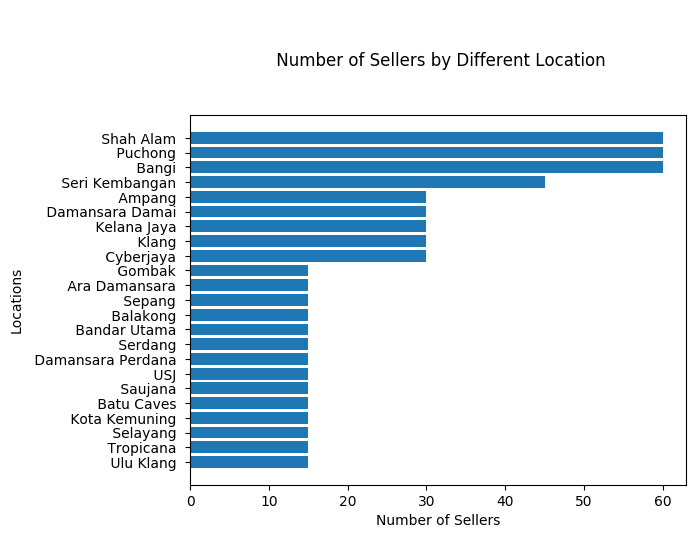

In [41]:
location_group = location_group.sort_values('title', ascending=False).reset_index(drop=True)
location_group.title

plt.rcdefaults()
fix,ax = plt.subplots()

area = location_group.area.tolist()
y_pos = np.arange(len(locations))
title = location_group.title.tolist()

ax.barh(y_pos,title)
ax.set_yticks(y_pos)
ax.set_yticklabels(area)
ax.invert_yaxis() 
ax.set_xlabel('Number of Sellers')
ax.set_ylabel('Locations')
ax.set_title('\n\n Number of Sellers by Different Location\n\n')

plt.show()


In [43]:
for i in range(len(location_average)):
    print("Average price in"+str(location_average.area[i])+"\t: RM %.2f" % round(location_average.price[i].mean(), 2))

Average price in Ampang 	: RM 310894.67
Average price in Ara Damansara 	: RM 302099.93
Average price in Balakong 	: RM 260780.00
Average price in Bandar Utama 	: RM 310880.00
Average price in Bangi 	: RM 289962.28
Average price in Batu Caves 	: RM 317415.93
Average price in Cyberjaya 	: RM 334945.97
Average price in Damansara Damai 	: RM 271197.97
Average price in Damansara Perdana 	: RM 327510.00
Average price in Gombak 	: RM 280176.67
Average price in Kelana Jaya 	: RM 298699.93
Average price in Klang 	: RM 302481.30
Average price in Kota Kemuning 	: RM 340730.00
Average price in Puchong 	: RM 310671.48
Average price in Saujana 	: RM 345749.27
Average price in Selayang 	: RM 298813.33
Average price in Sepang 	: RM 308679.33
Average price in Serdang 	: RM 294813.33
Average price in Seri Kembangan 	: RM 289731.09
Average price in Shah Alam 	: RM 324080.15
Average price in Tropicana 	: RM 320446.67
Average price in USJ 	: RM 266115.93
Average price in Ulu Klang 	: RM 285043.33
